## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [176]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")
sns.set_context("talk")

%matplotlib inline

In [177]:
def get_data(data_path: str):
  data = pd.read_csv(data_path, sep=",", encoding="utf-8", index_col=0)
  return data

In [178]:
data = get_data(data_path="../motorbike_ambulance_calls.csv")

In [179]:
data.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [180]:
data.shape

(17379, 14)

In [181]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000


In [182]:
data.max().T

date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [183]:
data.min().T

date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17379 non-null  object 
 1   season      17379 non-null  object 
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [185]:
data.isnull().sum()

date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<Axes: >

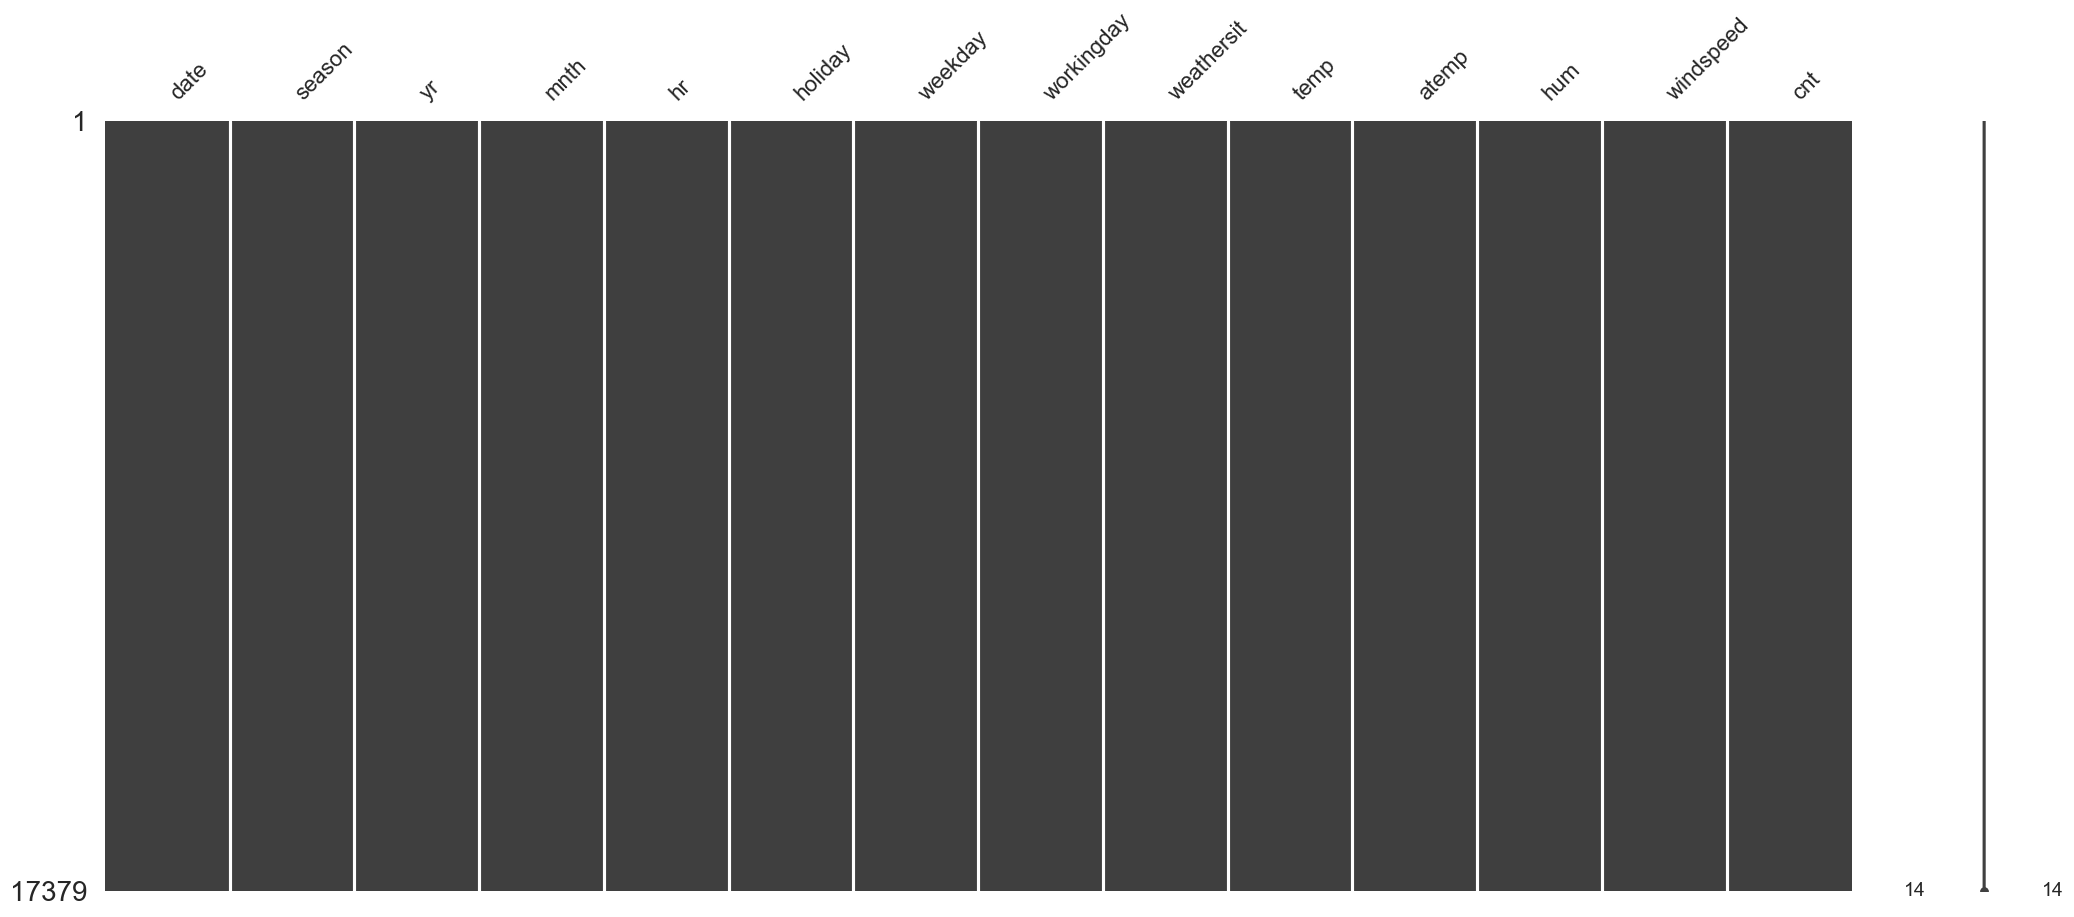

In [186]:
msno.matrix(data)

**Висновки з 1-3 завдання (детальні)**

1. Ми завантажили датасет перевірили які колонки містяться в нашому датасеті та вивели максимальні й мінімальні значення кожної колонки.
2. Дізнались типи даних цих колонок та те що кількість даних в кожній колонці є одинаковою **(17379)**
3. За допомогою функцій ```data.isnull().sum()``` та матриці ми зясували що в датасеті немає пропущених значень



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [187]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, "date")


In [188]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

In [189]:
get_time_limits(data, "date")

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


Ми перетворили колонку ```date``` в datetime тип даних та за допомогою функції ```get_time_limits``` вивели початкову та кінцеву дату яку містить датасет

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [190]:
data_categorical = data[["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]]

In [191]:
data_categorical.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
index,,,,,,,,
1,spring,0,1,0,0,6,0,1
2,spring,0,1,1,0,6,0,1
3,spring,0,1,2,0,6,0,1
4,spring,0,1,3,0,6,0,1
5,spring,0,1,4,0,6,0,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [192]:
def convert_to_numbers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    replaced_dict: dict[str, int] = dict()

    for v, i in zip(df[column].unique(), range(len(df[column].unique()))):
        if str(v) != "nan":
            replaced_dict[v] = i

    print(replaced_dict)
    df[column] = df[column].map(replaced_dict)

In [193]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  convert_to_numbers(df, season_col_name)
  return df
  
data = encode_season(data, 'season')

{'spring': 0, 'summer': 1, 'autumn': 2, 'winter': 3}


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

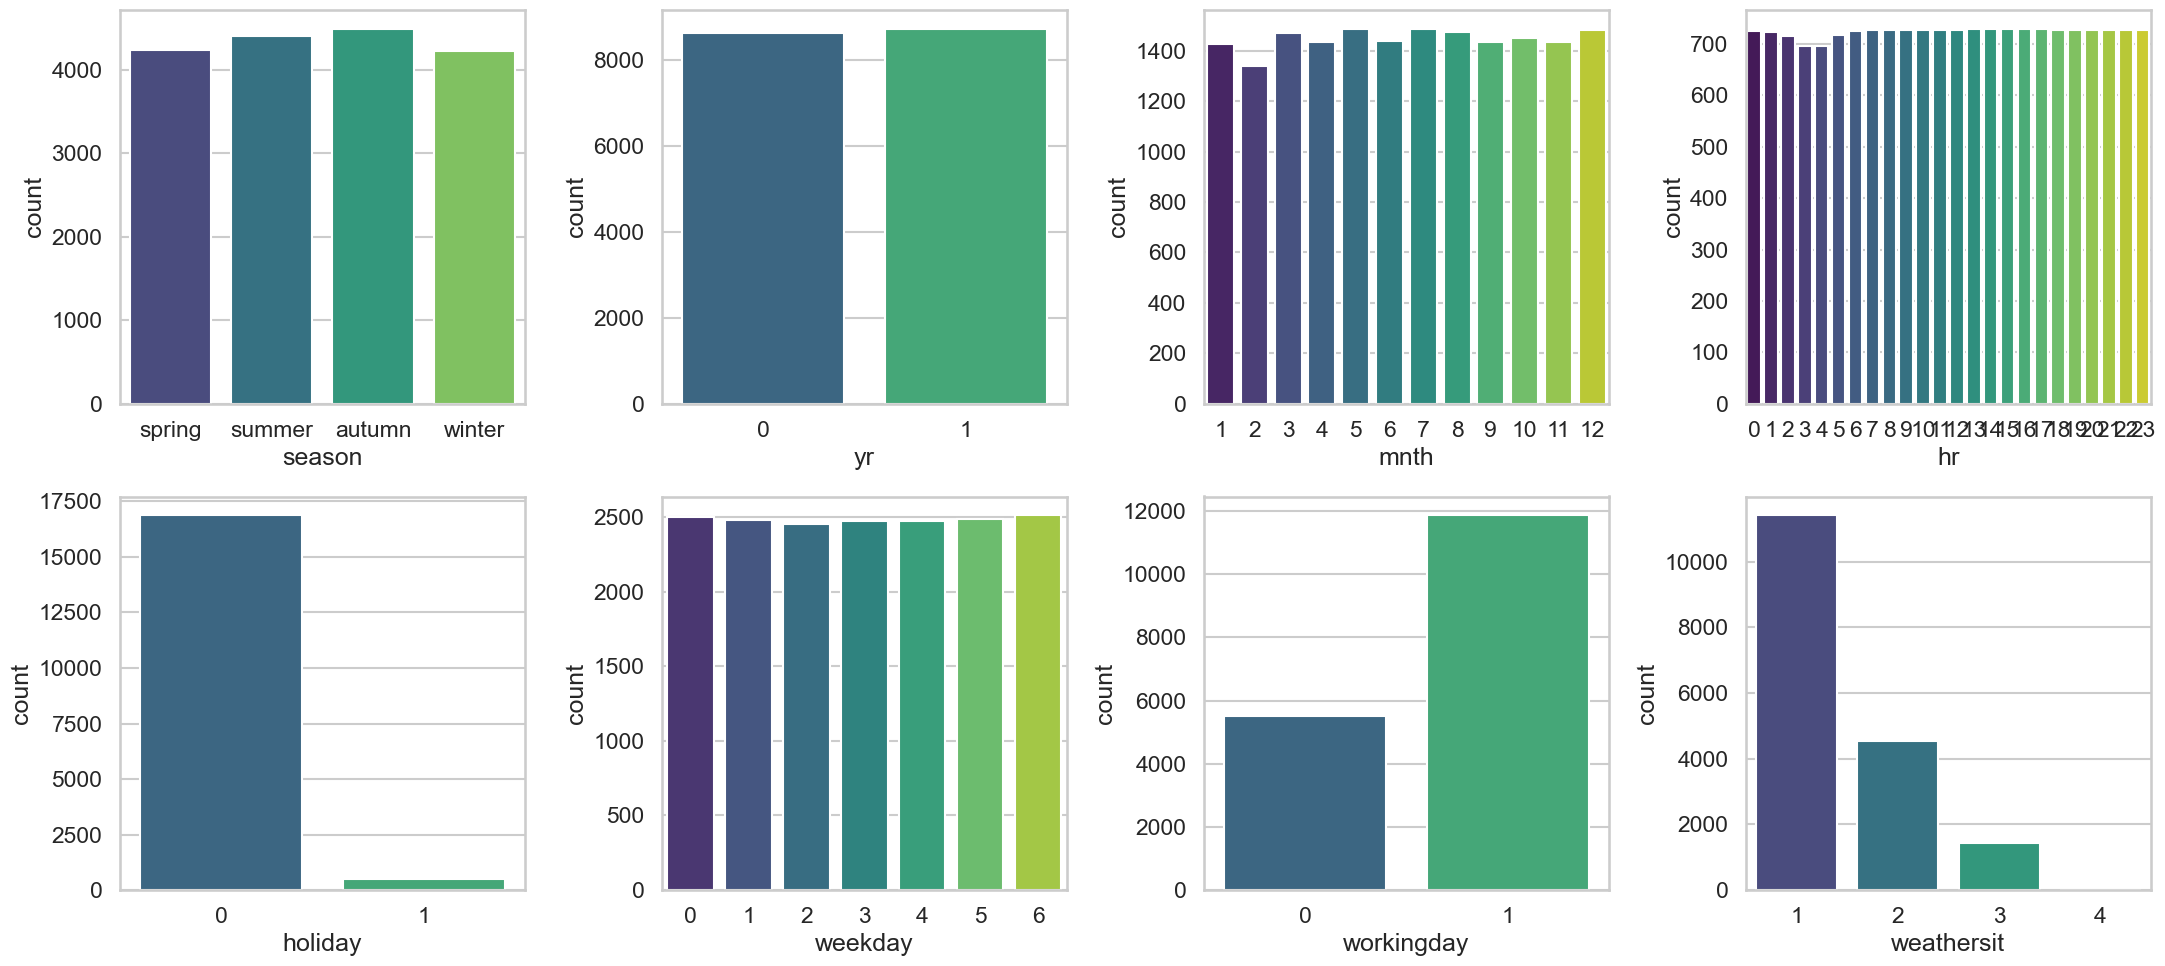

In [194]:
fig, ax = plt.subplots(2, 4, figsize=(22, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(
    data_categorical,
    x=variable,
    ax=subplot,
    palette="viridis"
  )

fig.tight_layout()

**Висновки з 5-7 завдання (детальні)**



5. Виділив всі на мою думку категоріальні змінні в окремий датафрейм ```data_categorical```
6. Тут я перетворив категоріальну строкову змінну ```season``` в числовий її варіант. Для цього я використав свою функцію ```convert_to_numbers``` яку використовував в минулій лабораторній роботі тому що я вважаю нема сенсу для такої задачі використовувати додаткові бібліотеки
7. Найбільш цікаві є графіки ```holiday, workingday, weathersit``` по них ми можемо сказати що більше викликів припадало на робочі дні в які була хороша погода. *Це логічно тому що мало хто захоче кататись на мотоциклі в сніг xD*



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [195]:
data_numerical = data[["temp", "atemp", "hum", "windspeed", "cnt"]]

In [196]:
data_numerical.head()

,temp,atemp,hum,windspeed,cnt
index,,,,,
1,0.24,0.2879,0.81,0.0,16
2,0.22,0.2727,0.80,0.0,40
3,0.22,0.2727,0.80,0.0,32
4,0.24,0.2879,0.75,0.0,13
5,0.24,0.2879,0.75,0.0,1


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

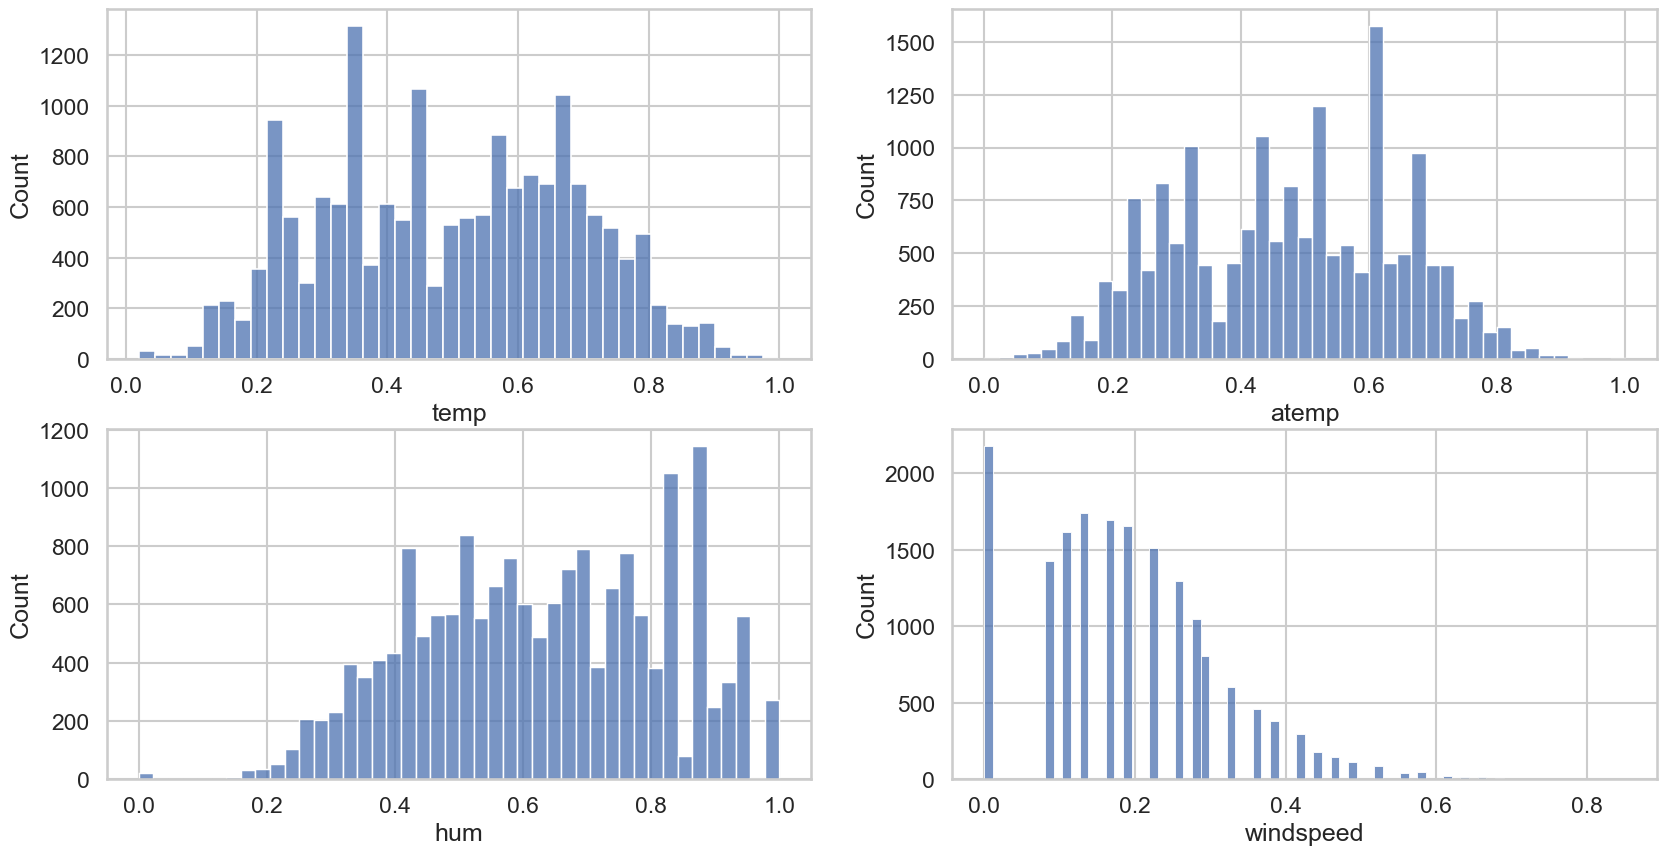

In [197]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
numerical_without_cnt = data_numerical.drop("cnt", axis=1)
for variable, subplot in zip(numerical_without_cnt, ax.flatten()):
    sns.histplot(
        numerical_without_cnt, 
        x=variable, 
        ax=subplot,
        palette="viridis"
    )

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

<Axes: xlabel='cnt', ylabel='Count'>

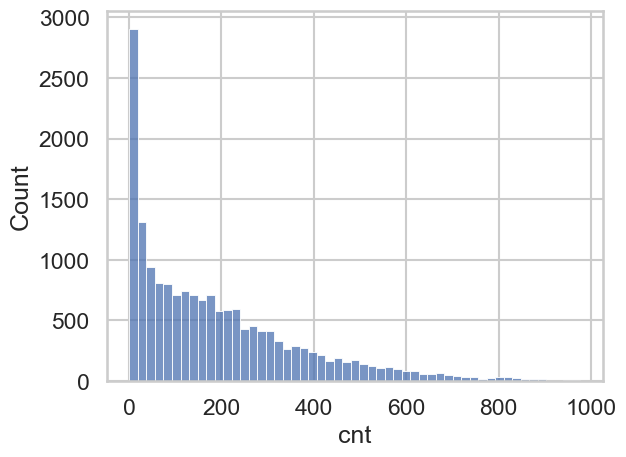

In [198]:
sns.histplot(
    data_numerical, 
    x=data_numerical["cnt"],
    palette="viridis"
)

In [199]:
data_numerical["cnt"].skew()

1.2774116037490577

**Висновки з 8-10 завдання (детальні)**



8. Виділив всі числові змінні в окремий датафрейм ```data_numerical``` та вивів його на екран
9. Всі гістограми мають важкі хвости що означає доволі сутєві відхилення від середніх значень. \
- Розподіли ```temp``` та ```atemp``` є мультимодальними розподілами де ```temp``` є бімодальним а ```atemp``` має 3 моди. 
- Розподіл ```hum``` наближається до рівномірного розподілу.
- Розподіл ```windspeed``` схожий на експоненційний розподіл.

10. На гістограмі розподілу ```cnt``` можна відразу побачити асиметрію яка може повпливати на результати при навчанні також на асиметрію вказує коефіцієнт скошеності який в нас доволі високий ```1.277``` додатнє значення вказує що асиметрія схилена праворуч це означає що є більше значень які більші за середнє.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

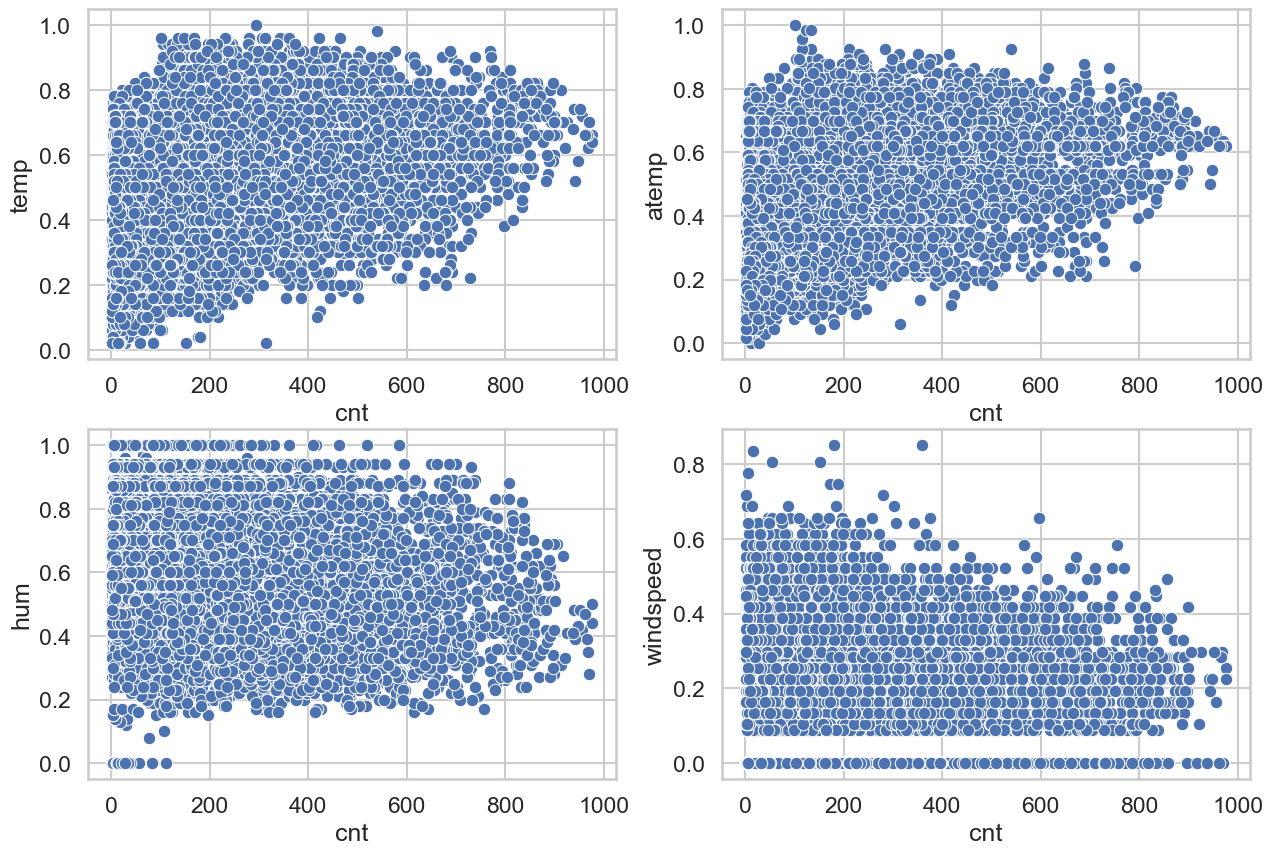

In [200]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(numerical_without_cnt, ax.flatten()):
  sns.scatterplot(
    data_numerical,
    x="cnt",
    y=var,
    ax=subplot,
    palette="viridis"
  )

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

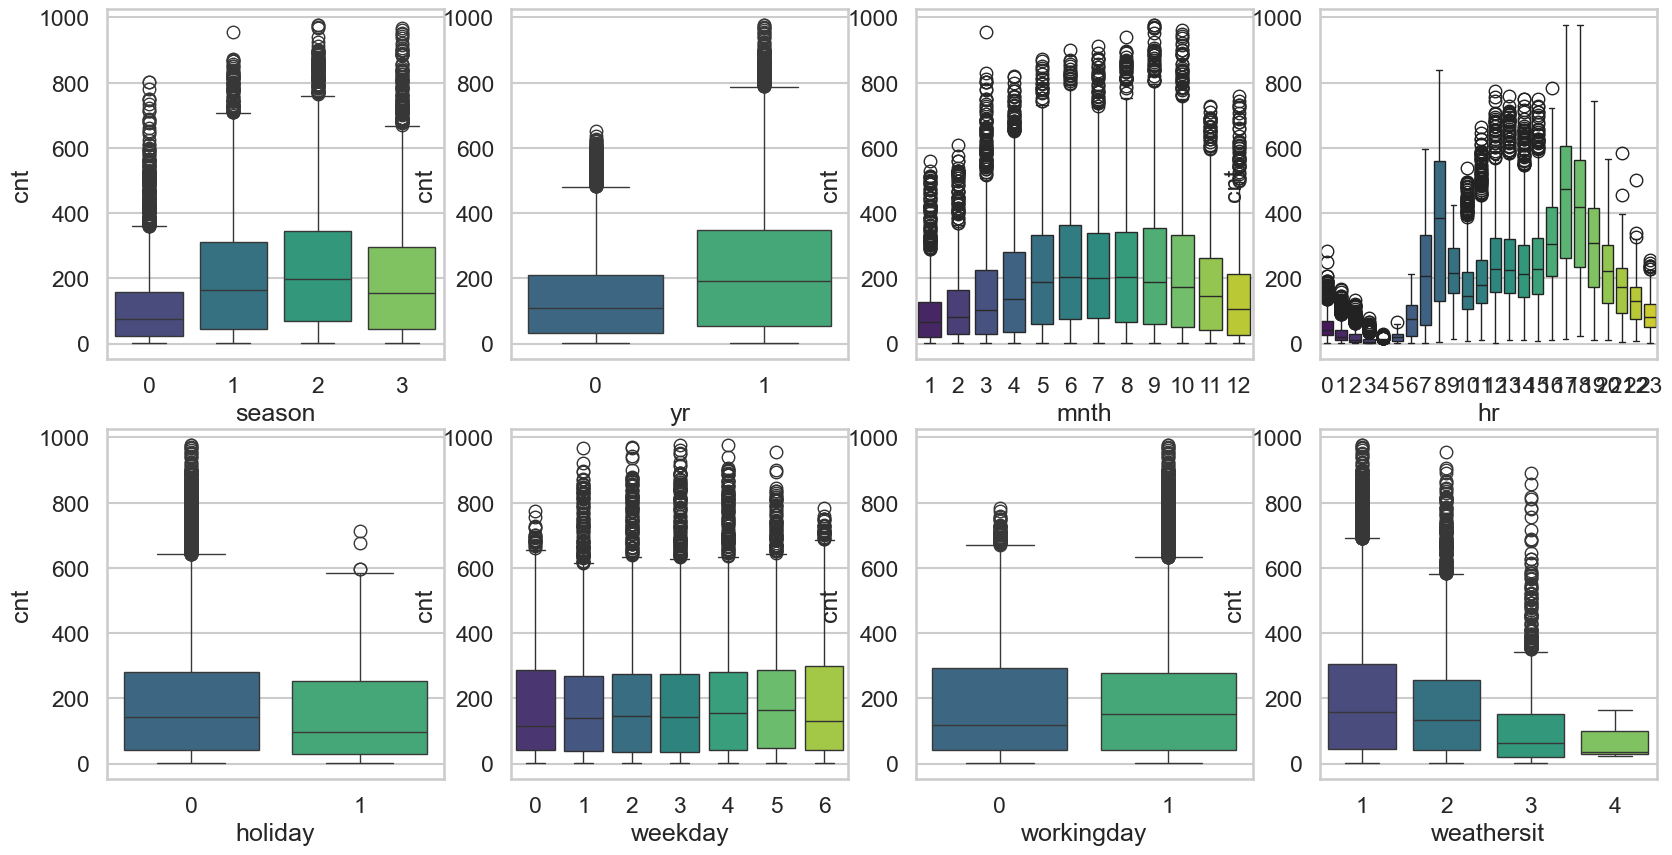

In [201]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(
    data,
    x=var,
    y="cnt",
    ax=subplot,
    palette="viridis"
  )

**Висновки з 11-12 завдання (детальні)**

11. З графіків залежності змінних до кількості дзвінків можна зробити висновок що у графіці ```windspeed``` є поділ на 2 групи виходячи з цього ми можемо утворити окрему фічу ```haswind``` яка може покращити результати.
12. З боксплотів цікавим є погодинне співідношення ```hr``` в якому можна чітко відслідкувати тенденцію на спад після вечора й до ранку та пікові значення в годині 8 та 18 приблизно тоді коли люди їдуть на роботу або повертаються додому.

**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

In [202]:
pearson_corr = data_numerical.corr("pearson")

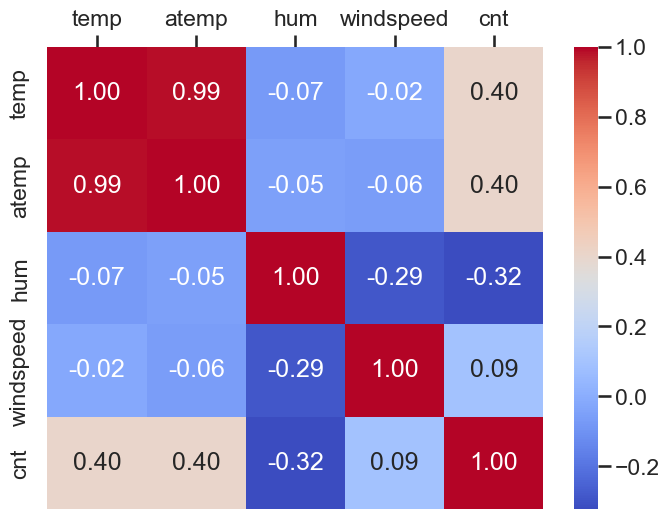

In [203]:
fig, ax = plt.subplots(figsize=(8,6))
corr = sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
corr.xaxis.tick_top()

In [204]:
spearman_corr = data_numerical.corr("spearman")

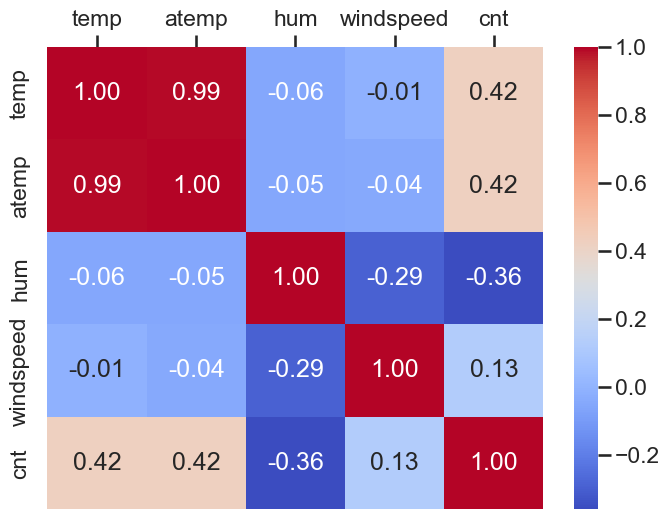

In [205]:
fig, ax = plt.subplots(figsize=(8,6))
corr = sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
corr.xaxis.tick_top()

**Висновки з 13 завдання (детальні)**

Для нашого датасету я б краще використовував кореляцію Спірмана тому що вона краще працює з даними які містять вкиди. 
Згідно матриці можна сказати що:
- Змінні ```temp``` та ```atemp``` є мультиколінеарними тому що мають дуже сильний звякок також вони корелюють з ```cnt``` що означає чим вища була температура тим більша була кількість дзвінків.
- Змінна ```hum``` також має негативний звязок з ```cnt``` та ```windspeed``` що означає чим менша вологість тим менше дзвінків та чим менша вологість тим менше швидкість вітру.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [206]:
def get_dummies(df: pd.DataFrame, categories: list[str], drop: bool = True):
  dummies = [pd.get_dummies(df[c], prefix=c) for c in categories]
  
  features = pd.concat([df, *dummies], axis=1)
  if drop:
    features = features.drop(categories, axis=1)

  return features

*Трішки переписав функцію щоб було зручніше користуватись в майбутньому )*

In [207]:
features = get_dummies(
    data, 
    ["season", "mnth", "weekday", "weathersit"]
)

features = get_dummies(features, ["hr"], drop=False)

In [208]:
features.head()

,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
index,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,16,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0,40,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0,32,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0,13,...,False,False,False,False,False,False,False,False,False,False
5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0,1,...,False,False,False,False,False,False,False,False,False,False


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [209]:
features['night_hours'] = data['hr'].apply(lambda x: not 18 > x >= 6)
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [210]:
features.head()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_0,...,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,night_hours
index,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,16,True,...,False,False,False,False,False,False,False,False,False,True
2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,40,True,...,False,False,False,False,False,False,False,False,False,True
3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,32,True,...,False,False,False,False,False,False,False,False,False,True
4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,13,True,...,False,False,False,False,False,False,False,False,False,True
5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,1,True,...,False,False,False,False,False,False,False,False,False,True


Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [211]:
features_lr = features.drop(['mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

- Змінну ```date``` видаляємо для того щоб наша моделька не орієнтувалась на дату тому що дата ніяк не впливає на кількість дзвінків і тільки запутає нашу модель та погіршить точність або модель пристосується до цього датасету і не буде працювати на реальних даних.
- Змінну ```atemp``` видаляємо тому що вона є лишньою та дублює змінну ```temp```

In [212]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis=1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [213]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [214]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [215]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10451.536, test: 10102.901
R^2 train: 0.688, test: 0.680


Після навчання моделі та її тестування ми отримали коефіцієнт детермінації рівний ```0.688``` при навчальних даних та ```0.680``` при тренувальних даних що фактично означає що у 68% модель не помиляється.

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

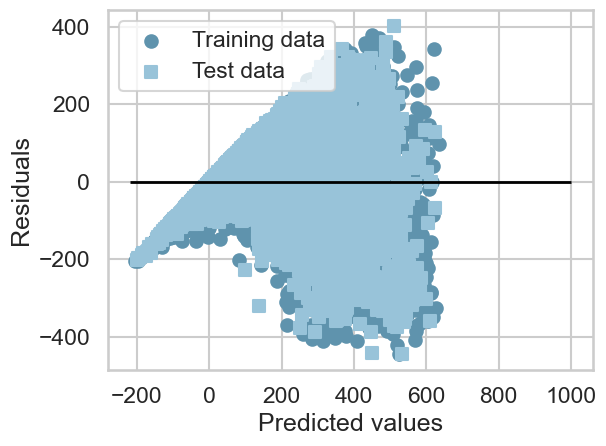

In [216]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()


Через те що ми працювали з множинною лінійною регресією тому нам потрібно будувати графік залишків від моделі. Згідно графіку в нас утворюється нелінійна структура навколо лінії регресії що свідчить про те що моделі не можна довіряти.
